# Length contraction

Alice has a very fast car. She passes Bob, who is standing on the ground, at a speed of 0.99 light-seconds per second. In Alice's frame, the car is 10 meters long. Is the car also 10 meters long in Bob's frame, or does it change?

Let's first plot the situation in Alice's frame of reference.

In [1]:
import spacetime as st
import matplotlib.pyplot as plt

def plot_worldline(ax, w_plot_data, label):
    out = ax.plot(*w_plot_data, label=label, marker='.')
    ax.set_xlabel('x-axis')
    ax.set_ylabel('t-axis')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return out

Let's say that at time `t = 0`, the back of Alice's car is at `x = 0` and the front is at `x = 10`. Both the front and back of the car are not moving, since they are stationary with respect to Alice, so they have velocity `dx/dt = 0`.

Also at `t = 0`, Bob is standing at `x = 0`. He moves at a velocity of `dx/dt = -0.99`.

We can create worldlines to describe the scenario like so:

In [2]:
car_front_0 = st.Worldline(
    vertices=[
        # (t, x)
        (0, 10)
    ],
    ends_vel_s=(0,))

car_back_0 = st.Worldline(
    [(0, 0)],
    (0,))

bob_0 = st.Worldline(
    [(0, 0)],
    (-0.99,))

The API documentation describes the `ends_vel_s` argument, but in brief, it allows you to specify the velocity of the worldline at its past and future ends, so that we can define worldlines that span infinitely into the past and future at a fixed velocity.

(-10.0, 20.0)

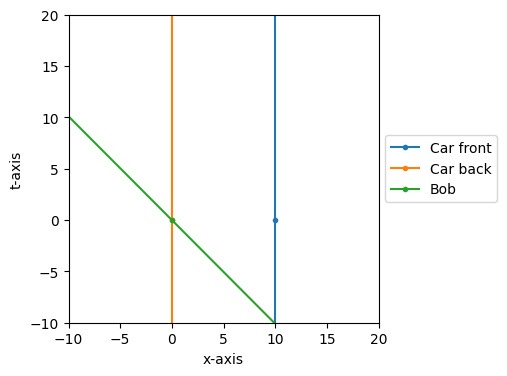

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))

plot_worldline(
    ax,
    car_front_0.plot(end_extension_time=100),
    "Car front")

plot_worldline(
    ax,
    car_back_0.plot(end_extension_time=100),
    "Car back")

plot_worldline(
    ax,
    bob_0.plot(end_extension_time=100),
    "Bob")

ax.set_xlim(-10, 20)
ax.set_ylim(-10, 20)

We can see that Alice's car remains 10 meters long the whole time. Now let's boost to Bob's frame to see what happens.

In [4]:
car_front_1 = car_front_0.boost(-0.99)
car_back_1 = car_back_0.boost(-0.99)
bob_1 = bob_0.boost(-0.99)

(-5.0, 10.0)

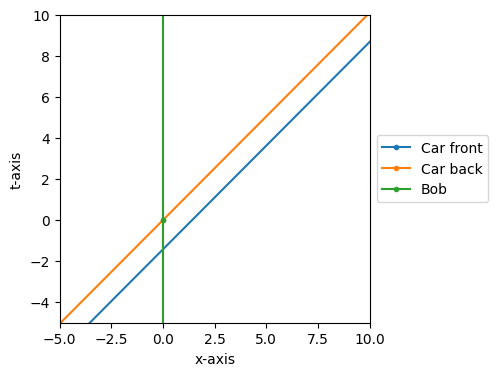

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))

plot_worldline(
    ax,
    car_front_1.plot(end_extension_time=100),
    "Car front")

plot_worldline(
    ax,
    car_back_1.plot(end_extension_time=100),
    "Car back")

plot_worldline(
    ax,
    bob_1.plot(end_extension_time=100),
    "Bob")

ax.set_xlim(-5, 10)
ax.set_ylim(-5, 10)

We can clearly see that in Bob's frame, Alice's car is no longer 10 meters long.

In [6]:
car_back_1.eval(time=0)

array([0., 0.])

In [7]:
car_front_1.eval(time=0)

array([0.       , 1.4106736])

At `t = 0` in Bob's frame, the back of the car is at `x = 0` and the front is as `x = 1.41`, so Alice's car has contracted to 1.41 meters.